# Virat Kohli ODI Performance Analysis
## Exploratory Data Analysis (EDA) Project

## Project Objective

This project performs comprehensive exploratory data analysis (EDA) on Virat Kohli's ODI (One Day International) batting performances to understand his scoring patterns, consistency, aggression, and role-based impact across innings, batting positions, and opponents.


📌 Key Questions Explored

How are runs distributed across innings?

How does strike rate vary with scoring volume?

Does batting position influence consistency and aggression?

How much do boundaries contribute to total runs?

Against which opponents does performance vary?

# <font color =blue> Importing Libraries

In [1]:
# Filtering out the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## <font color =blue> Dataset Loading and Basic Inspection

In [3]:
df = pd.read_csv("Virat Kohli DataSet.csv")

## Dataset Overview
The dataset contains ball-by-ball aggregated batting information including
runs scored, balls faced, strike rate, batting position, dismissal type,
opposition, ground, and match date.

In [4]:
df.head()

,Runs,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,22,1,0,54.54,2.0,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,67,6,0,55.22,2.0,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,38,4,0,65.78,1.0,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,66,7,0,81.81,1.0,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,46,3,1,67.39,1.0,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


In [5]:
print(f'\n--- DATA TYPES & INFO ---')
print(df.info(verbose=True))
print(f'Dataset Shape:{df.shape}')


--- DATA TYPES & INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Runs        132 non-null    int64  
 1   BF          132 non-null    int64  
 2   4s          132 non-null    int64  
 3   6s          132 non-null    int64  
 4   SR          132 non-null    float64
 5   Pos         132 non-null    float64
 6   Dismissal   132 non-null    object 
 7   Inns        132 non-null    int64  
 8   Opposition  132 non-null    object 
 9   Ground      132 non-null    object 
 10  Start Date  132 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 11.5+ KB
None
Dataset Shape:(132, 11)


In [6]:
print(f'\n--- BASIC STATISTICS ---')
print(df.describe().round(2))
print(f'\nColumn Names: {df.columns.tolist()}')


--- BASIC STATISTICS ---
         Runs      BF      4s      6s      SR     Pos    Inns
count  132.00  132.00  132.00  132.00  132.00  132.00  132.00
mean    46.85   50.87    4.37    0.55   76.99    3.30    1.58
std     41.99   38.73    4.40    1.09   37.87    0.87    0.50
min      0.00    0.00    0.00    0.00    0.00    1.00    1.00
25%     10.00   17.75    1.00    0.00   61.70    3.00    1.00
50%     32.50   42.50    3.00    0.00   78.71    3.00    2.00
75%     80.25   82.25    7.00    1.00  100.00    4.00    2.00
max    154.00  140.00   18.00    7.00  209.09    7.00    2.00

Column Names: ['Runs', 'BF', '4s', '6s', 'SR', 'Pos', 'Dismissal', 'Inns', 'Opposition', 'Ground', 'Start Date']


In [7]:
df.describe(include='object')

,Dismissal,Opposition,Ground,Start Date
count,132,132,132,132
unique,7,11,52,132
top,caught,v Sri Lanka,Dhaka,18-Aug-08
freq,84,24,7,1


##  <font color =blue> Data Cleaning and Preparation

This section ensures data consistency by handling data types, sorting by date,
and creating derived features required for analysis.


In [8]:
# Checking for missing values
print('Missing Values:')
df.isnull().sum()

Missing Values:


Runs          0
BF            0
4s            0
6s            0
SR            0
Pos           0
Dismissal     0
Inns          0
Opposition    0
Ground        0
Start Date    0
dtype: int64

In [9]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

### Data Validation
- No missing values detected
- No duplicate records detected

In [10]:
# Convert Start Date to datetime
df['Start Date']= pd.to_datetime(df['Start Date'],format='%d-%b-%y')
df.sort_values('Start Date',inplace= True)

In [11]:
df['Year'] = df['Start Date'].dt.year
df['Month'] = df['Start Date'].dt.month

In [12]:
# Data type conversions
df['Pos'] = df['Pos'].astype('int64')
df['SR'] = df['SR'].astype('float64')

In [13]:
# Created derived columns for analysis
df['Is_Century']= (df['Runs']>=100).astype(int)
df['Is_Fifty'] = ((df['Runs']>=50) & (df['Runs']<100)).astype(int)
df['Is_Duck'] = (df['Runs']==0).astype(int)
print('\n✓ Data Cleaning Completed')
print(f'Final Dataset Shape: {df.shape}')


✓ Data Cleaning Completed
Final Dataset Shape: (132, 16)


## <font color =blue> Univariate Analysis

#### Univariate Analysis: Runs Scored

**Objective:**  
To understand the overall distribution of runs scored per innings and identify
patterns such as consistency, outliers, and high-impact performances.


[RUNS DISTRIBUTION]
Total Runs:6184
Average Runs:46.85
Median Runs:32.50
Standard Deviation:41.99
Range:0-154


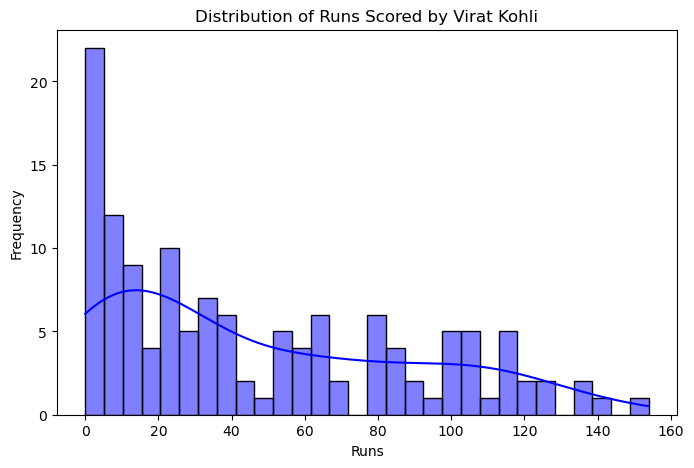

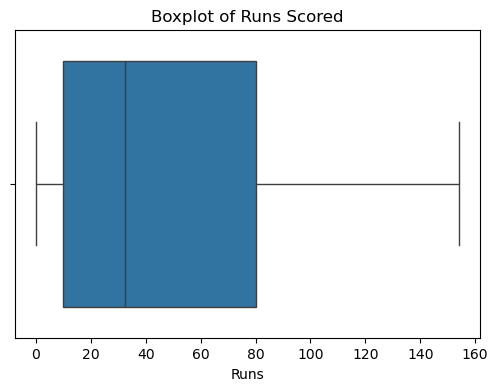

In [14]:
print('[RUNS DISTRIBUTION]')
print(f"Total Runs:{df['Runs'].sum()}")
print(f"Average Runs:{df['Runs'].mean():.2f}")
print(f"Median Runs:{df['Runs'].median():.2f}")
print(f"Standard Deviation:{df['Runs'].std():.2f}")
print(f"Range:{df['Runs'].min()}-{df['Runs'].max()}")

plt.figure(figsize=(8,5))
sns.histplot(df['Runs'], bins=30, kde=True,color='Blue')
plt.title("Distribution of Runs Scored by Virat Kohli")
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['Runs'])
plt.title("Boxplot of Runs Scored")
plt.xlabel("Runs")
plt.show()

### INSIGHTS:
- The distribution of runs is right-skewed, indicating that low-scoring innings are more common.
- The median lies closer to the lower quartile, showing that more than half of the innings result in modest scores.
- A long right whisker and extreme values indicate a few exceptional high-scoring innings.
- These rare high scores contribute significantly to overall performance despite their low frequency.


#### Univariate Analysis: Balls Faced

**Objective:**  
To analyze the distribution of balls faced per innings and understand how long
Virat Kohli typically stays at the crease, including the presence of short and
long innings.


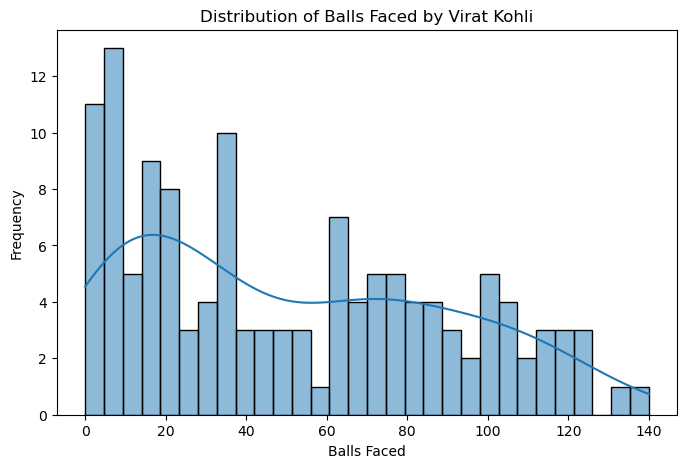

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['BF'], bins=30, kde=True)
plt.title("Distribution of Balls Faced by Virat Kohli")
plt.xlabel("Balls Faced")
plt.ylabel("Frequency")
plt.show()

### INSIGHTS:
- The distribution of balls faced is right-skewed, indicating many short stays
  at the crease.
- A smaller number of innings involve a high number of balls faced, representing
  anchor or match-defining performances.

#### Univariate Analysis: Strike Rate

**Objective:**  
To examine the overall distribution of strike rates and assess the balance
between aggression and stability in scoring patterns.


Average SR: 76.99
Median SR: 78.71
SR > 100 (Aggressive): 31 innings


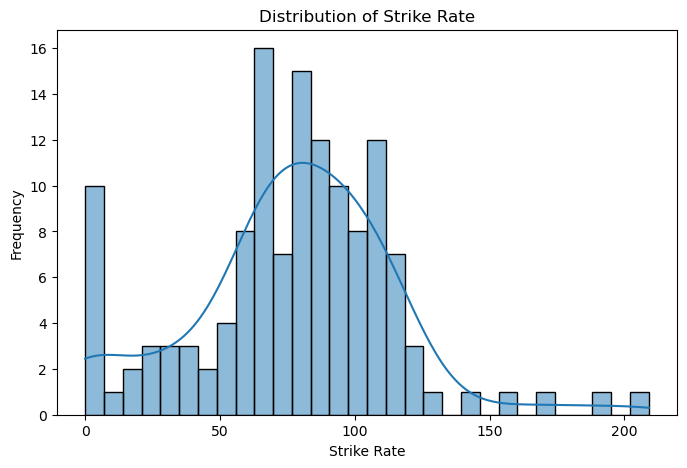

In [16]:
print(f'Average SR: {df["SR"].mean():.2f}')
print(f'Median SR: {df["SR"].median():.2f}')
print(f'SR > 100 (Aggressive): {(df["SR"] > 100).sum()} innings')

plt.figure(figsize=(8,5))
sns.histplot(df['SR'],bins=30,kde=True)
plt.title("Distribution of Strike Rate")
plt.xlabel("Strike Rate")
plt.ylabel("Frequency")
plt.show()

### INSIGHTS:
- Most strike rate values fall between 70 and 110, indicating a balanced scoring approach.
- The distribution shows a slight right skew, with a few innings having very high strike rates.
- Aggressive innings (SR > 100) are present but limited, suggesting situational acceleration.
- Very low strike rates correspond to short or difficult innings and are less frequent.


#### Univariate Analysis: Boundaries

**Objective:**  
To understand how frequently boundaries contribute to innings and evaluate
their role in overall run accumulation.


Total Fours: 577
Total Sixes: 72
Runs from Boundaries: 2740 (44.3%)


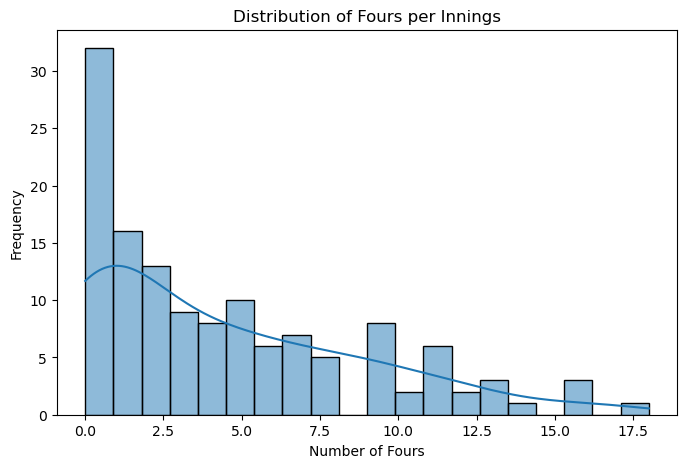

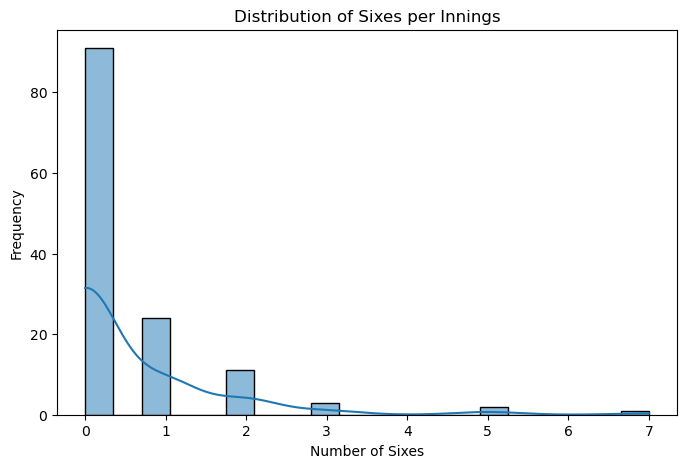

In [17]:
print(f'Total Fours: {df["4s"].sum()}')
print(f'Total Sixes: {df["6s"].sum()}')
boundary_runs = (df['4s']*4 + df['6s']*6).sum()
print(f'Runs from Boundaries: {boundary_runs} ({(boundary_runs/df["Runs"].sum())*100:.1f}%)')

plt.figure(figsize=(8,5))
sns.histplot(df['4s'],bins=20,kde=True)
plt.title("Distribution of Fours per Innings")
plt.xlabel("Number of Fours")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['6s'],bins=20,kde=True)
plt.title("Distribution of Sixes per Innings")
plt.xlabel("Number of Sixes")
plt.ylabel("Frequency")
plt.show()

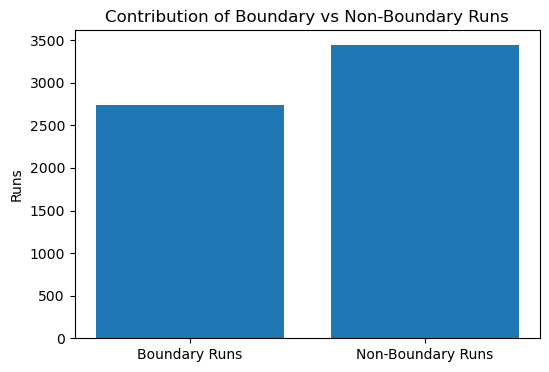

In [18]:
non_boundary_runs = df['Runs'].sum() - boundary_runs

plt.figure(figsize=(6,4))
plt.bar(['Boundary Runs', 'Non-Boundary Runs'],
        [boundary_runs, non_boundary_runs])
plt.title("Contribution of Boundary vs Non-Boundary Runs")
plt.ylabel("Runs")
plt.show()


### INSIGHTS:
- A significant portion of total runs comes from boundaries, highlighting effective shot placement.
- Fours are more frequent than sixes, indicating a preference for controlled aggression.
- Six-hitting is relatively limited, suggesting power-hitting is used selectively.
- Non-boundary runs form a substantial share, showing strong running between the wickets.


#### Univariate Analysis: Batting Position

**Objective:**  
To analyze the distribution of batting positions and identify where Virat Kohli
most frequently bats.


Pos
1     3
2     3
3    91
4    28
5     3
6     1
7     3
Name: count, dtype: int64


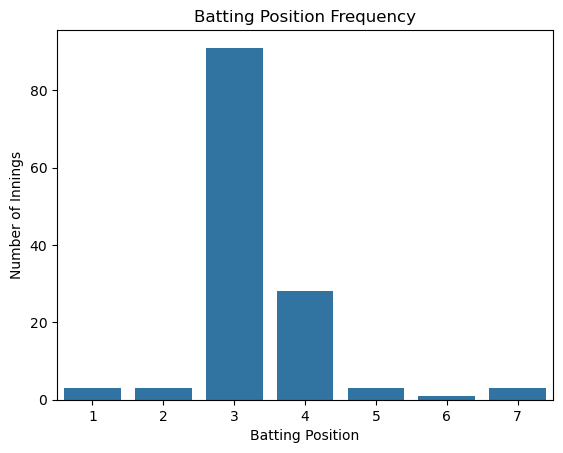

In [19]:
print(df['Pos'].value_counts().sort_index())
sns.countplot(x='Pos', data=df)
plt.title("Batting Position Frequency")
plt.xlabel("Batting Position")
plt.ylabel("Number of Innings")
plt.show()


### INSIGHTS:
- Virat Kohli has predominantly batted at position 3, indicating a stable top-order role.
- Batting at position 4 occurs occasionally, reflecting situational flexibility.
- Very few innings at lower positions suggest limited involvement outside the top order.

#### Univariate Analysis: Dismissal Types

**Objective:**  
To examine the most common modes of dismissal and identify patterns in how
Virat Kohli gets out during innings.


Dismissal
caught        84
not out       17
run out       10
bowled        10
lbw            9
stumped        1
hit wicket     1
Name: count, dtype: int64


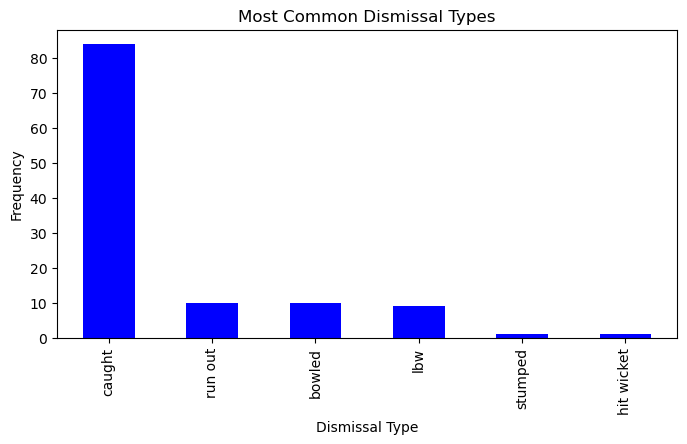

In [20]:
print(df['Dismissal'].value_counts())
dismissed_df = df[df['Dismissal'].str.lower() != 'not out']
dismissal_counts = dismissed_df['Dismissal'].value_counts()

plt.figure(figsize=(8,4))
dismissal_counts.plot(kind='bar',color='Blue')
plt.title("Most Common Dismissal Types")
plt.xlabel("Dismissal Type")
plt.ylabel("Frequency")
plt.show()

# INSIGHTS:
- Caught dismissals account for the largest proportion of dismissals.
- LBW and bowled dismissals form a smaller but notable share.
- Run-outs occur less frequently, indicating generally good running between wickets.
- Overall dismissal distribution reflects common patterns seen in limited-overs cricket.


## <font color =blue> Bivariate Analysis

#### Bivariate Analysis: Runs vs Balls Faced

**Objective:**  
To understand whether Virat Kohli’s high scores are primarily driven by
longer stays at the crease (balls faced) or by faster scoring rates.


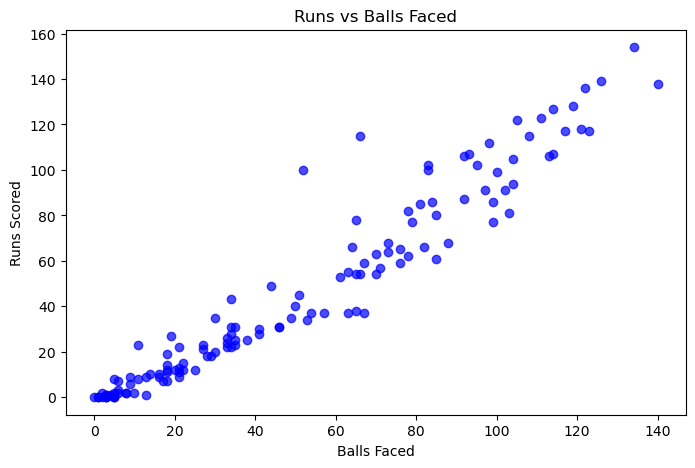

In [21]:
plt.figure(figsize=(8,5))
plt.scatter(df['BF'], df['Runs'], alpha=0.7,color='Blue')
plt.title('Runs vs Balls Faced')
plt.xlabel('Balls Faced')
plt.ylabel('Runs Scored')
plt.show()

### Insights
- There is a clear positive relationship between balls faced and runs scored,
  indicating that longer stays generally result in higher scores.
- Several innings achieve high runs with comparatively fewer balls,
  highlighting Kohli’s ability to accelerate scoring when required.


#### Bivariate Analysis: Runs vs Strike Rate

**Objective:**  
To assess whether aggressive scoring (higher strike rate) consistently leads to
higher run accumulation.


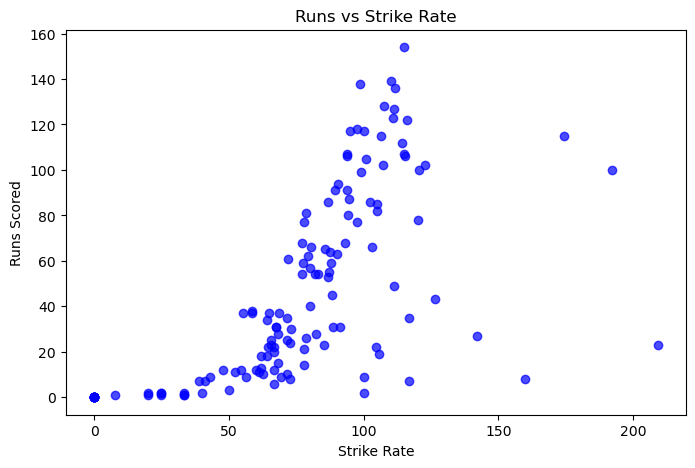

In [22]:
plt.figure(figsize=(8,5))
plt.scatter(df['SR'], df['Runs'], alpha=0.7,color='blue')
plt.title('Runs vs Strike Rate')
plt.xlabel('Strike Rate')
plt.ylabel('Runs Scored')
plt.show()


### INSIGHTS:
- High strike rate does not always result in high run scores.
- Many high-scoring innings are achieved at moderate strike rates,suggesting that innings longevity plays a more critical role than extreme aggression.


#### Bivariate Analysis: Batting Position vs Runs

**Objective:**  
To evaluate how batting position influences run-scoring consistency and
performance responsibility.


<Figure size 800x500 with 0 Axes>

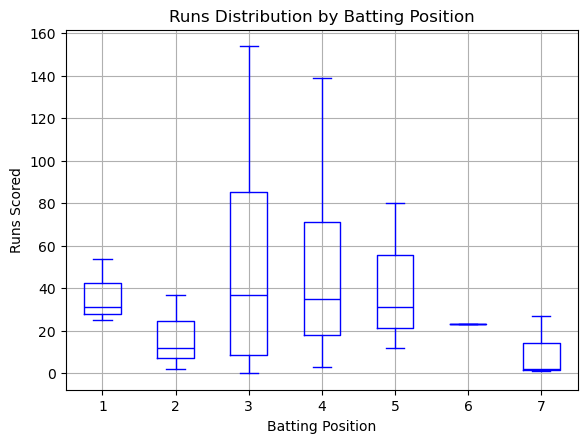

In [23]:
plt.figure(figsize=(8,5))
df.boxplot(column='Runs', by='Pos',color='blue')
plt.title('Runs Distribution by Batting Position')
plt.suptitle('')
plt.xlabel('Batting Position')
plt.ylabel('Runs Scored')
plt.show()

### INSIGHTS:
- Batting position 3 shows the highest median runs and consistency, indicating that Kohli performs best when batting in the top order.
- Lower batting positions show fewer opportunities for high scores.


#### Bivariate Analysis: Batting Position vs Strike Rate

**Objective:**  
To understand how batting position affects scoring intent and aggression.

<Figure size 800x500 with 0 Axes>

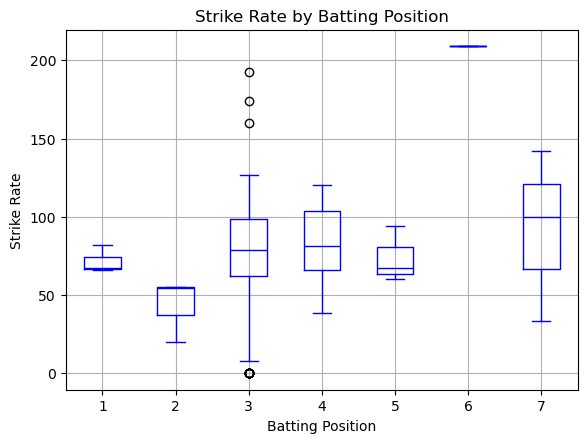

In [24]:
plt.figure(figsize=(8,5))
df.boxplot(column='SR', by='Pos',color='blue')
plt.title('Strike Rate by Batting Position')
plt.suptitle('')
plt.xlabel('Batting Position')
plt.ylabel('Strike Rate')
plt.show()

### Insights
- Strike rates tend to increase in lower batting positions.
- Top-order positions prioritize stability, while lower-order roles demand
  quicker scoring.


#### Bivariate Analysis: Boundaries vs Runs

**Objective:**  
To assess how boundary frequency contributes to total run accumulation.


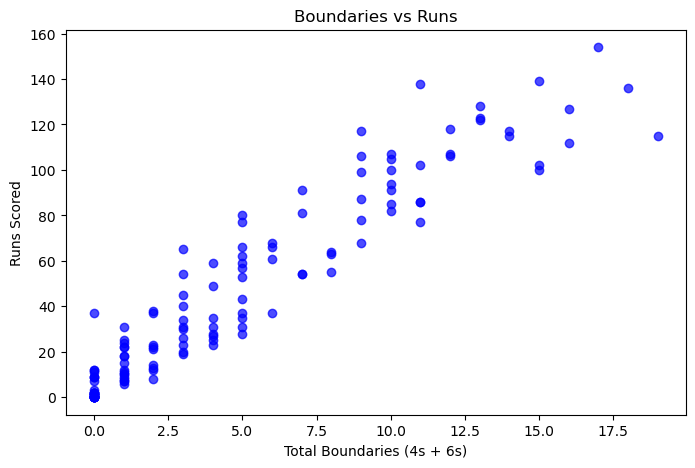

In [25]:
df['Boundaries'] = df['4s'] + df['6s']

plt.figure(figsize=(8,5))
plt.scatter(df['Boundaries'], df['Runs'], alpha=0.7,color='blue')
plt.title('Boundaries vs Runs')
plt.xlabel('Total Boundaries (4s + 6s)')
plt.ylabel('Runs Scored')
plt.show()

### Insights
- Innings with a higher number of boundaries generally result in higher run
  totals.
- However, boundaries alone do not fully explain high scores, emphasizing the
  importance of innings duration.

#### Bivariate Analysis: Boundaries vs Strike Rate

**Objective:**  
To understand the impact of boundary-hitting on scoring rate.


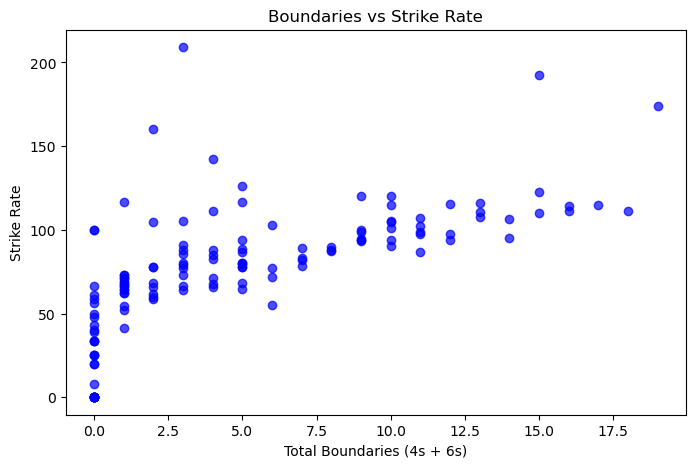

In [26]:
plt.figure(figsize=(8,5))
plt.scatter(df['Boundaries'], df['SR'], alpha=0.7,color='blue')
plt.title('Boundaries vs Strike Rate')
plt.xlabel('Total Boundaries (4s + 6s)')
plt.ylabel('Strike Rate')
plt.show()

### Insights
- Strike rate increases sharply with the number of boundaries hit.
- Boundary-heavy innings significantly boost scoring pace even in shorter stays.

#### Bivariate Analysis: Opposition vs Average Runs

**Objective:**  
To evaluate how Virat Kohli’s run-scoring performance varies across different
opponents.

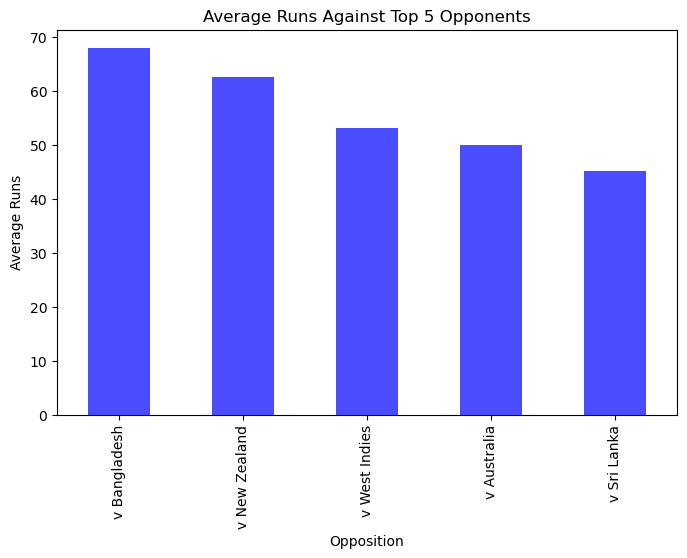

In [27]:
top_opponents = (
    df.groupby('Opposition')['Runs'].mean().sort_values(ascending=False).head(5))

plt.figure(figsize=(8,5))
top_opponents.plot(kind='bar',color='blue',alpha=0.7)
plt.title('Average Runs Against Top 5 Opponents')
plt.xlabel('Opposition')
plt.ylabel('Average Runs')
plt.show()


### Insights
- Average run output varies noticeably across opponents.
- This suggests contextual performance differences influenced by bowling quality
  and match conditions.


## <font color =blue> Multivariate Analysis

#### Multivariate Analysis: Runs vs Balls Faced by Batting Position

**Objective:**  
To analyze how run accumulation varies with balls faced across different batting
positions and identify role-based scoring patterns.


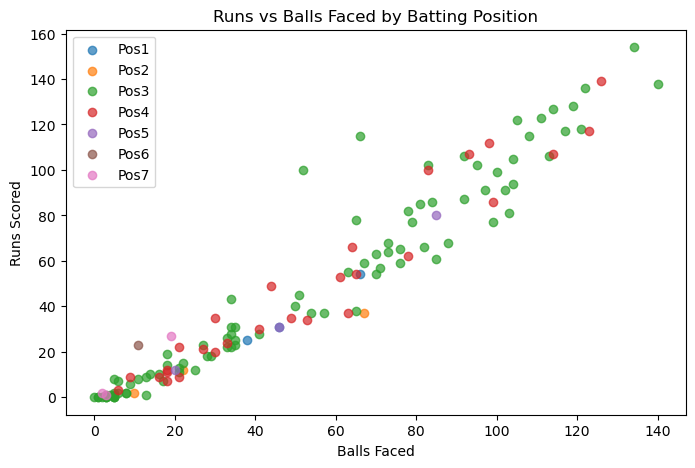

In [29]:
plt.figure(figsize=(8,5))
for pos in sorted(df['Pos'].unique()):
    subset= df[df['Pos']== pos]
    plt.scatter(subset['BF'],subset['Runs'],label=f'Pos{pos}',alpha=0.7)
plt.title('Runs vs Balls Faced by Batting Position')
plt.xlabel('Balls Faced')
plt.ylabel('Runs Scored')
plt.legend()
plt.show()

### Insights
- Top-order batting positions show a clear positive relationship between balls
  faced and runs scored.
- Position 3 demonstrates the most consistent high-run accumulation with longer
  stays at the crease.
- Lower positions show fewer long innings, reflecting role constraints rather
  than scoring inefficiency.


#### Multivariate Analysis: Runs vs Strike Rate with Boundary Contribution

**Objective:**  
To examine how boundary frequency influences both strike rate and total runs
scored in an innings.


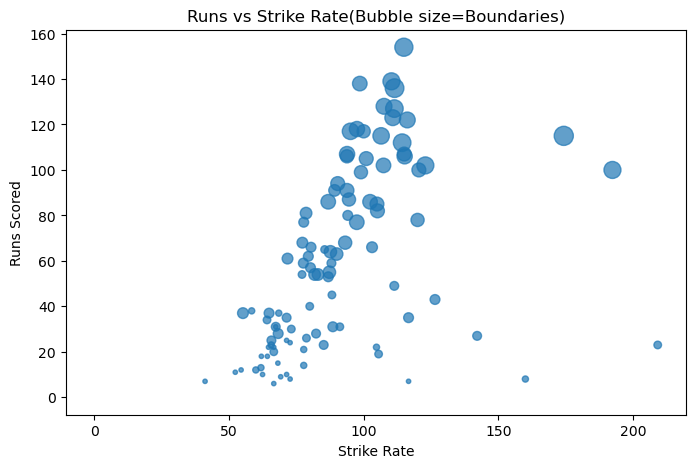

In [30]:
plt.figure(figsize=(8,5))
plt.scatter(df['SR'],df['Runs'],s=df['Boundaries']*10,alpha=0.7)
plt.title('Runs vs Strike Rate(Bubble size=Boundaries)')
plt.xlabel('Strike Rate')
plt.ylabel('Runs Scored')
plt.show()

### Insights
- Boundary-heavy innings tend to have higher strike rates.
- High run totals are not exclusively boundary-driven, reinforcing the importance
  of sustained innings alongside aggression.


#### Multivariate Analysis: Performance by Opposition

**Objective:**  
To evaluate Virat Kohli’s batting performance across different opponents by
analyzing both run accumulation and scoring rate, thereby assessing his
adaptability to varying bowling attacks and match contexts.


                 Avg_Runs     Avg_SR  Innings
Opposition                                   
v Australia     49.950000  82.615500       20
v England       39.523810  76.599048       21
v South Africa  37.200000  68.557333       15
v Sri Lanka     45.166667  78.992500       24
v West Indies   53.105263  82.440526       19


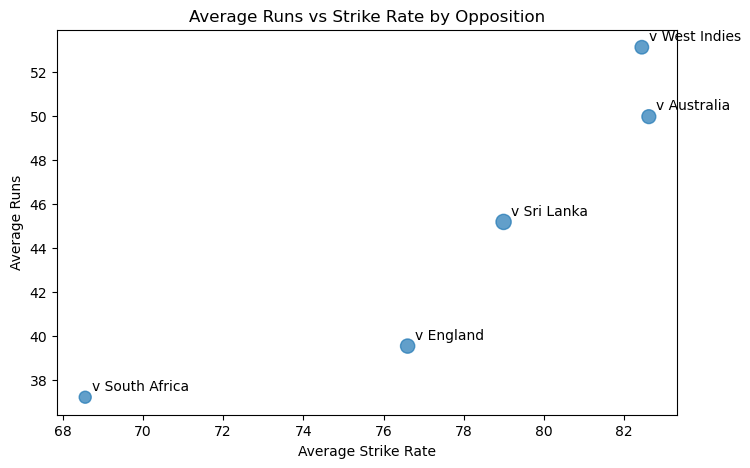

In [43]:
top_opponents = (df['Opposition'].value_counts().head(5).index)
opp_summary = (df[df['Opposition'].isin(top_opponents)]
                .groupby('Opposition')
                .agg(Avg_Runs=('Runs','mean'),Avg_SR=('SR','mean'),Innings=('Runs','count')))
print(opp_summary)
plt.figure(figsize=(8,5))
plt.scatter(
    opp_summary['Avg_SR'],
    opp_summary['Avg_Runs'],
    s=opp_summary['Innings'] * 5,   # bubble size = sample strength
    alpha=0.7
)

for opp in opp_summary.index:
    plt.annotate(
        opp,
        (opp_summary.loc[opp, 'Avg_SR'],
         opp_summary.loc[opp, 'Avg_Runs']
        ),textcoords="offset points",xytext=(5,5)
    )

plt.title('Average Runs vs Strike Rate by Opposition')
plt.xlabel('Average Strike Rate')
plt.ylabel('Average Runs')
plt.show()                    

### Insights
- Virat Kohli’s performance varies across opponents in both run accumulation
  and strike rate, indicating context-dependent scoring patterns.
- Higher average runs against certain opponents suggest comfort and consistency
  against specific bowling attacks.
- Variations in strike rate reflect strategic adjustments based on opposition
  strength and match situations rather than a fixed scoring approach.


#### CORRELATION ANALYSIS

**Objective:**
Correlation analysis helps identify the strength and direction of relationships between numerical batting metrics, providing a holistic understanding of performance drivers.

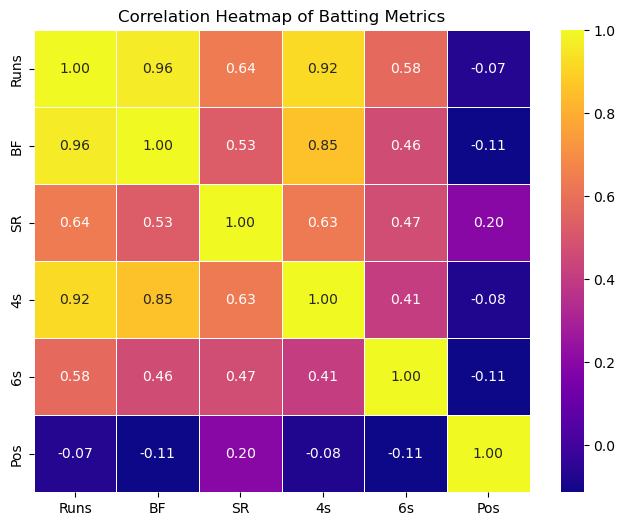

In [46]:
corr_cols = ['Runs', 'BF', 'SR', '4s', '6s', 'Pos']
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='plasma',
    fmt='.2f',
    linewidths=0.5
)

plt.title('Correlation Heatmap of Batting Metrics')
plt.show()

### INSIGHTS:
- Runs show strong positive correlation with Balls Faced.
- Strike Rate has a weaker correlation with Runs.
- Confirms that consistency and innings-building drive performance more than aggression.



## Key Insights & Observations

- Runs show a strong positive relationship with balls faced, indicating that Virat Kohli’s high scores are primarily driven by spending more time at the crease rather than aggressive scoring alone.

- Boundary contributions (fours and sixes) support run accumulation, but a significant portion of runs also comes from strike rotation and singles, reflecting a balanced batting approach.

- Strike rate varies across innings and contexts, but it does not solely determine high-scoring performances, highlighting situational adaptability.

- Most innings are played at top-order batting positions, with consistent performance across roles, suggesting reliability irrespective of batting position.

- Dismissal patterns are dominated by conventional modes such as caught and bowled, indicating disciplined shot selection rather than reckless play.

- Performance varies across oppositions, reflecting contextual adjustments based on bowling strength and match situations.


# Conclusion

In this project, I analyzed Virat Kohli’s batting performance using exploratory data 
analysis to understand his scoring patterns and consistency. The analysis shows that higher
scores mostly come from spending more time at the crease rather than playing aggressively
from the start. Boundary hits help in building runs, but a large part of his scoring also 
comes from rotating the strike and playing according to the situation. His performance 
remains consistent across different batting positions and varies sensibly against different
oppositions. Overall, this analysis highlights a balanced and adaptable batting style and
demonstrates how data analysis can be used to draw meaningful insights from real-world 
sports data.
